In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

In [135]:
df = pd.read_excel('Risk_Factors.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [137]:
df = df.set_index('Date')

In [139]:
df_ri = pd.read_excel ('Industry_Portfolios.xlsx')
df_ri = df_ri.set_index('Date')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [141]:
df_rm = pd.read_excel ('Market_Portfolio.xlsx')
df_rm = df_rm.set_index('Date')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [143]:
df_all = pd.concat([df, df_ri, df_rm], axis = 1)

In [145]:
df_all

,Rf,Rm-Rf,SMB,HML,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,,,,,
200401,0.07,2.15,2.67,1.55,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
200402,0.06,1.40,-1.17,0.45,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
200403,0.09,-1.32,1.84,0.07,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
200404,0.08,-1.83,-2.59,-1.67,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
200405,0.06,1.17,-0.10,-0.33,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
201309,0.00,3.76,2.85,-1.59,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
201310,0.00,4.17,-1.56,1.31,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17


In [147]:
industry_list = list(df_ri.columns)

In [149]:
industry_list

['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [151]:
# Calculate the excess return of the asset: Asset Return - Risk-Free Rate
for x in df_ri.columns:
    df_ri[x+'-rf'] = df_ri[x] - df['Rf']

In [153]:
df_ri

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,NoDur-rf,Durbl-rf,Manuf-rf,Enrgy-rf,HiTec-rf,Telcm-rf,Shops-rf,Hlth-rf,Utils-rf,Other-rf
Date,,,,,,,,,,,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [155]:
df_ri['NoDur']

Date
200401    0.06
200402    4.25
200403   -0.09
200404    1.42
200405   -1.89
          ... 
201308   -4.00
201309    1.94
201310    4.75
201311    1.29
201312    2.65
Name: NoDur, Length: 120, dtype: float64

In [157]:
# #CAHART 4 FACTOR MODEL
# # Define the dependent variable (Excess return of the asset)
# alpha_list = []
# beta_mkt_list = []
# beta_smb_list = []
# beta_hml_list = []
# beta_umd_list = []

# for industry in industry_list:
#     # Define the independent variables (factors: Market Risk Premium, SMB, HML)
#     X = df[['Rm-Rf', 'SMB', 'HML', 'UMD']]

#     # Add a constant (alpha) to the model
#     X = sm.add_constant(X)
#     # print(X)
#     y = df_ri[industry+'-rf']
#     # print(y)
#     # print(industry)
#     # Perform the regression
#     model = sm.OLS(y, X).fit()

#     alpha = model.params['const']
#     alpha_list.append(alpha)
#     beta_mkt = model.params['Rm-Rf']
#     beta_mkt_list.append(beta_mkt)
#     beta_smb = model.params['SMB']
#     beta_smb_list.append(beta_smb)
#     beta_hml = model.params['HML']
#     beta_hml_list.append(beta_hml)
#     beta_umd = model.params['UMD']
#     beta_umd_list.append(beta_umd)
    
    
#     # Display the results
#     # print(model.summary())

# df_cahart = pd.DataFrame({'Industry': industry_list
#                       , 'Alpha' : alpha_list
#                       , 'Beta_Mkt' : beta_mkt_list
#                       , 'Beta_SMB' : beta_smb_list
#                       , 'Beta_HML': beta_hml_list
#                       , 'Beta_UMD': beta_umd_list}).set_index('Industry')

# df_cahart

In [163]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Initialize lists to store results
constant_list = []
upsidebeta_list = []
downsidebeta_list = []


def market_model_dual_beta(df, df_ri, industry_list, risk_free_rate_series):
    """
    Perform OLS regression for the Market Model with dual beta (upside and downside beta) for each industry,
    without re-subtracting the risk-free rate from asset and market returns.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing market factors (e.g., 'Rm-Rf').
    df_ri (pd.DataFrame): DataFrame containing asset returns for each industry adjusted by the risk-free rate.
    industry_list (list): List of industry names to process.
    risk_free_rate_series (pd.Series): Series of risk-free rates (R_f) for each time period (used only for dummy calculation).
    
    Returns:
    pd.DataFrame: A DataFrame with constants, upside betas, and downside betas for each industry.
    """
    for industry in industry_list:
        # Define the asset returns (y) and independent variables (already adjusted by risk-free rate)
        excess_asset_returns = df_ri[industry + '-rf']
        excess_market_returns = df['Rm-Rf']

        # Create dummy variable: 1 if market return < risk-free rate, otherwise 0
        downside_dummy = (df['Rm-Rf'] + risk_free_rate_series < risk_free_rate_series).astype(int)
        
        # Create interaction term for downside beta
        downside_interaction = downside_dummy * excess_market_returns

        # Combine terms into a DataFrame for regression
        regression_data = pd.DataFrame({
            'Constant': 1,
            'Market_Excess_Returns': excess_market_returns,
            'Downside_Interaction': downside_interaction
        })

        # Perform OLS regression: Ri - Rf = alpha + beta * (Rm - Rf) + beta* * Downside_Interaction
        model = sm.OLS(excess_asset_returns, regression_data).fit()
        
        # Extract and store results
        constant = model.params['Constant']
        upsidebeta = model.params['Market_Excess_Returns']
        downsidebeta = model.params['Downside_Interaction']
        
        constant_list.append(constant)
        upsidebeta_list.append(upsidebeta)
        downsidebeta_list.append(downsidebeta)

    # Create the result DataFrame
    df_beta = pd.DataFrame({
        'Industry': industry_list,
        'Constant': constant_list,
        'upsidebeta': upsidebeta_list,
        'downsidebeta': downsidebeta_list
    }).set_index('Industry')

    return df_beta

# Example usage with hypothetical data
# industry_list = ['Industry1', 'Industry2', ...]  # Define your industry list here
# df = pd.DataFrame(...)  # Define your market factors DataFrame here, including 'Rm-Rf'
# df_ri = pd.DataFrame(...)  # Define your industry excess returns DataFrame here
# risk_free_rate_series = pd.Series(...)  # Replace with your risk-free rate series

# Run the dual beta market model
result = market_model_dual_beta(df, df_ri, industry_list, df['Rf'])
result


,Constant,upsidebeta,downsidebeta
Industry,,,
NoDur,0.592891,0.582525,0.130452
Durbl,-1.385192,1.958054,-0.565411
Manuf,0.234796,1.144217,0.043432
Enrgy,0.738078,0.890984,0.136542
HiTec,-0.420463,1.246134,-0.208350
Telcm,0.415494,0.831149,0.129267
Shops,0.056025,0.899105,-0.127467
Hlth,0.378389,0.630760,0.082665
Utils,1.057486,0.342040,0.357127


In [165]:
industry_list

['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [167]:
# Define the dependent variable (Excess return of the asset)
alpha_list = []
beta_mkt_list = []
beta_smb_list = []
beta_hml_list = []

for industry in industry_list:
    # Define the independent variables (factors: Market Risk Premium, SMB, HML)
    X = df[['Rm-Rf', 'SMB', 'HML']]

    # Add a constant (alpha) to the model
    X = sm.add_constant(X)
    # print(X)
    y = df_ri[industry+'-rf']
    # print(y)
    # print(industry)
    # Perform the regression
    model = sm.OLS(y, X).fit()

    alpha = model.params['const']
    alpha_list.append(alpha)
    beta_mkt = model.params['Rm-Rf']
    beta_mkt_list.append(beta_mkt)
    beta_smb = model.params['SMB']
    beta_smb_list.append(beta_smb)
    beta_hml = model.params['HML']
    beta_hml_list.append(beta_hml)
    
    
    # Display the results
    # print(model.summary())

In [169]:
df_ff = pd.DataFrame({'Industry': industry_list
                      , 'Alpha' : alpha_list
                      , 'Beta_Mkt' : beta_mkt_list
                      , 'Beta_SMB' : beta_smb_list
                      , 'Beta_HML': beta_hml_list}).set_index('Industry')

In [171]:
df_ff

,Alpha,Beta_Mkt,Beta_SMB,Beta_HML
Industry,,,,
NoDur,0.386704,0.712134,-0.229102,-0.023342
Durbl,-0.474342,1.447452,0.670878,0.240949
Manuf,0.153285,1.142282,0.087388,0.027727
Enrgy,0.523007,1.028354,-0.259360,-0.008158
HiTec,-0.065979,1.152803,0.335674,-0.556947
Telcm,0.200724,0.924137,-0.080299,-0.019063
Shops,0.255941,0.770227,0.280191,-0.039080
Hlth,0.257472,0.751976,-0.212655,-0.143765
Utils,0.474411,0.631827,-0.387961,-0.016881


## Sharpe_Ratio

In [174]:
sharpe_ratio_list = []
for industry in industry_list:
    sharpe_ratio = df_ri[industry+'-rf'].mean() / df_ri[industry+'-rf'].std()
    sharpe_ratio_list.append(sharpe_ratio)

In [176]:
df_calc = pd.DataFrame({'Industry': industry_list, 'Sharpe_Ratio' : sharpe_ratio_list}).set_index('Industry')

In [178]:
df_calc

,Sharpe_Ratio
Industry,
NoDur,0.231099
Durbl,0.072356
Manuf,0.166616
Enrgy,0.181708
HiTec,0.118552
Telcm,0.169064
Shops,0.191753
Hlth,0.172529
Utils,0.210948


## Sortino_Ratio

In [181]:
sortino_ratio_list = []
threshold = 0

for industry in industry_list:
    excess_return = df_ri[industry+'-rf']
    
    # Calculate semi-variance: only negative returns below the threshold contribute to semi-variance
    downside_returns = np.where(excess_return < threshold, excess_return, threshold)
    semi_variance = (downside_returns ** 2).mean()

    # if semi_variance == 0:
    #     semi_variance = 1e-10
    
    sortino_ratio = excess_return.mean() / np.sqrt(semi_variance)
    
    sortino_ratio_list.append(sortino_ratio)

In [183]:
sortino_ratio_list

[0.3508041482772444,
 0.11196655832234702,
 0.24125968078640753,
 0.2736116179717163,
 0.1706204171237372,
 0.2449399654741521,
 0.29303151810784056,
 0.2702939204941117,
 0.29004356542348525,
 0.0873509467389702]

In [185]:
df_calc['Sortino_Ratio'] = sortino_ratio_list

In [187]:
df_calc

,Sharpe_Ratio,Sortino_Ratio
Industry,,
NoDur,0.231099,0.350804
Durbl,0.072356,0.111967
Manuf,0.166616,0.241260
Enrgy,0.181708,0.273612
HiTec,0.118552,0.170620
Telcm,0.169064,0.244940
Shops,0.191753,0.293032
Hlth,0.172529,0.270294
Utils,0.210948,0.290044


## Treynor Ratio

In [28]:
list_beta = []
list_alpha = []
for industry in industry_list:
    beta_slope, alpha_intercept = np.polyfit (df['Rm-Rf'],df_ri[industry+'-rf'],1) 
                                    #independent var (x), such as excess market return, depended var (y) such as excess portfol return 
    list_beta.append(beta_slope)
    list_alpha.append(alpha_intercept)

In [29]:
treynor_ratio_list = []
i = 0
for industry in industry_list:
    excess_return = df_ri[industry+'-rf']
    treynor_ratio = excess_return.mean() / list_beta[i]
    i = i+1
    treynor_ratio_list.append(treynor_ratio)

In [30]:
df_calc['Treynor_Ratio'] = treynor_ratio_list

In [31]:
df_calc

,Sharpe_Ratio,Sortino_Ratio,Treynor_Ratio
Industry,,,
NoDur,0.231099,0.350804,1.186372
Durbl,0.072356,0.111967,0.367463
Manuf,0.166616,0.241260,0.758251
Enrgy,0.181708,0.273612,1.143330
HiTec,0.118552,0.170620,0.564295
Telcm,0.169064,0.244940,0.836363
Shops,0.191753,0.293032,0.951258
Hlth,0.172529,0.270294,0.971435
Utils,0.210948,0.290044,1.452334


## Jensen's alpha

In [33]:
list_beta = []
list_alpha = []
for industry in industry_list:
    beta_slope, alpha_intercept = np.polyfit (df['Rm-Rf'],df_ri[industry+'-rf'],1) 
                                    #independent var (x), such as excess market return, depended var (y) such as excess portfol return 
    list_beta.append(beta_slope)
    list_alpha.append(alpha_intercept)

In [34]:
df_calc['Jensens_Alpha'] = list_alpha

In [35]:
df_calc

,Sharpe_Ratio,Sortino_Ratio,Treynor_Ratio,Jensens_Alpha
Industry,,,,
NoDur,0.231099,0.350804,1.186372,0.369717
Durbl,0.072356,0.111967,0.367463,-0.417903
Manuf,0.166616,0.241260,0.758251,0.160494
Enrgy,0.181708,0.273612,1.143330,0.504485
HiTec,0.118552,0.170620,0.564295,-0.064024
Telcm,0.169064,0.244940,0.836363,0.194348
Shops,0.191753,0.293032,0.951258,0.274093
Hlth,0.172529,0.270294,0.971435,0.236968
Utils,0.210948,0.290044,1.452334,0.446523


## Fama French 3 Factor Alpha

In [37]:
alpha_list

[0.38670448576261796,
 -0.4743418290004339,
 0.15328459357527685,
 0.5230069868911492,
 -0.06597942391258158,
 0.20072402259738864,
 0.25594106688536755,
 0.25747232214033533,
 0.47441058218313337,
 -0.40441152890824256]

In [38]:
df_calc['Fama_French_3_Factor_Alpha'] = alpha_list

In [39]:
df_calc

,Sharpe_Ratio,Sortino_Ratio,Treynor_Ratio,Jensens_Alpha,Fama_French_3_Factor_Alpha
Industry,,,,,
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411


In [40]:
# np.set_printoptions(precision = 3)

# plt.style.use("ggplot")

# mpl.rcParams["axes.grid"] = True
# mpl.rcParams["grid.color"] = "grey"
# mpl.rcParams["grid.alpha"] = 0.25

# mpl.rcParams["axes.facecolor"] = "white"

# mpl.rcParams["legend.fontsize"] = 14

In [41]:
metric_list = list(df_calc.columns)

In [42]:
metric_list

['Sharpe_Ratio',
 'Sortino_Ratio',
 'Treynor_Ratio',
 'Jensens_Alpha',
 'Fama_French_3_Factor_Alpha']

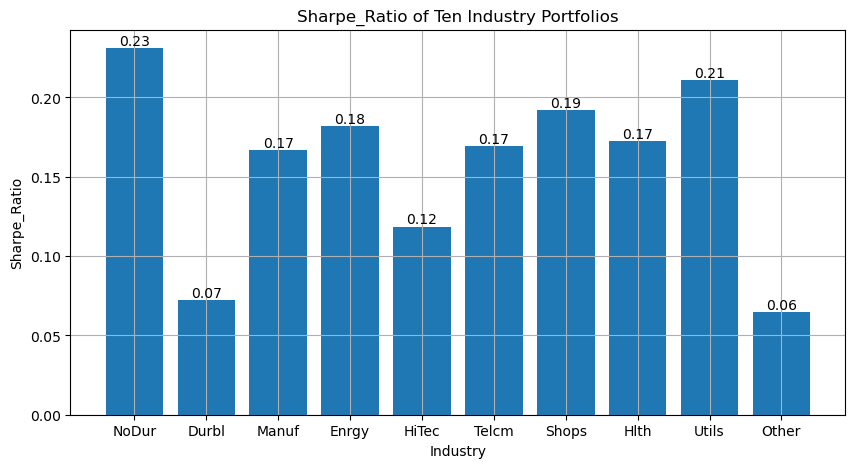

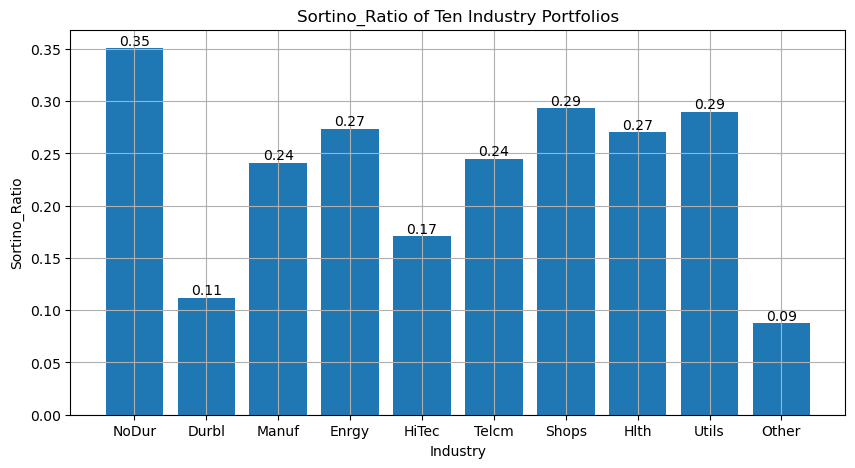

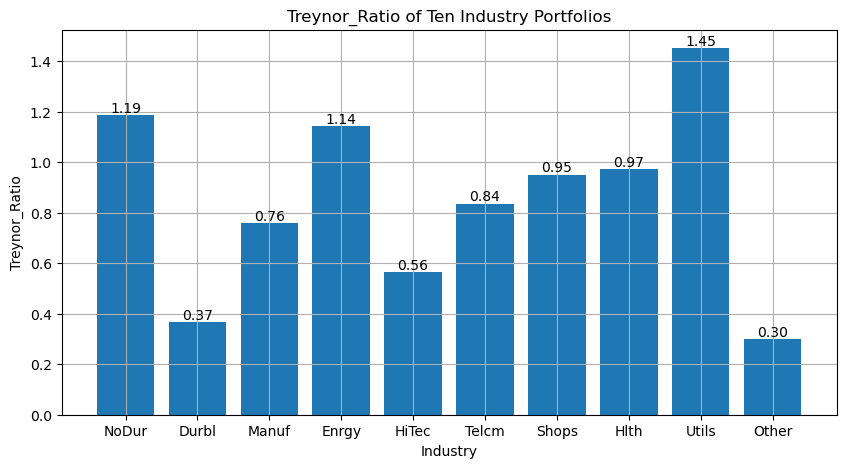

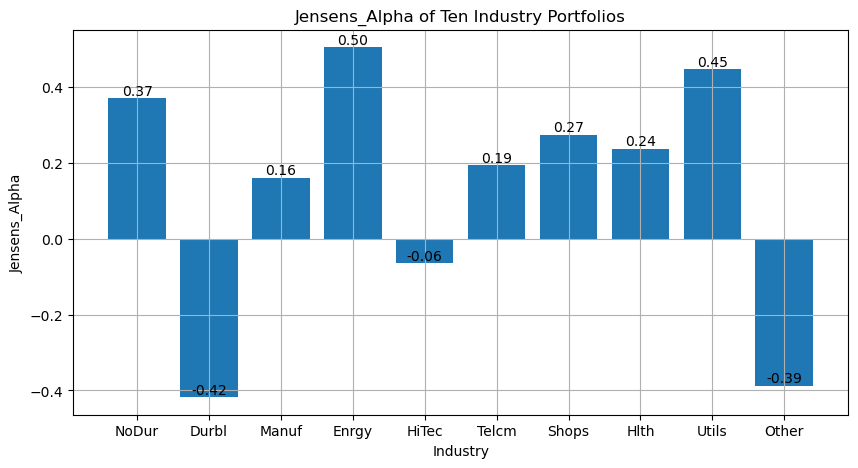

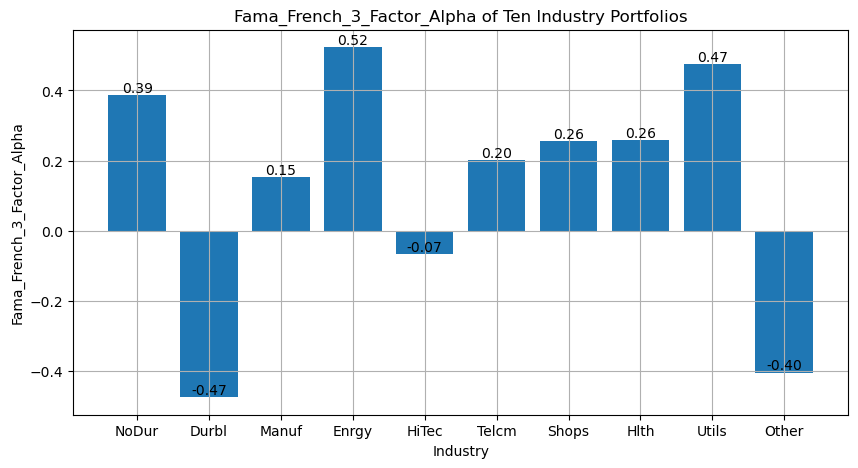

In [43]:
for x in metric_list:
    plt.figure(figsize=[10,5])
    bars = plt.bar(industry_list, df_calc[x])

    plt.xlabel('Industry')
    plt.ylabel(x)
    plt.title(x + ' of Ten Industry Portfolios')
    plt.grid()
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')